## Importación de librerías

Se cargan librerías para manipular datos, hacer gráficos y aplicar modelos de clasificación. También se configuran opciones del entorno para gráficos en línea y evitar advertencias.



In [168]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_curve, auc, confusion_matrix
)
from sklearn.preprocessing import label_binarize

## Carga del dataset

Se lee el archivo CSV con los datos de pacientes con cáncer y se muestran las primeras filas para revisar su contenido.

In [169]:
df = pd.read_csv("global_cancer_patients_2015_2024.csv")

df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


## Exploración inicial

Se revisa la forma del dataset, el tipo de datos, si hay columnas duplicadas y se listan los nombres de todas las columnas.

In [170]:
print(f"Filas y columnas: {df.shape}")

df.info()

print(f"¿Hay columnas duplicadas? {df.columns.duplicated().any()}")

print("Columnas:", df.columns.tolist())

Filas y columnas: (50000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  5

## Revisión de nulos y estadísticas

Se identifican los valores nulos por columna y se muestran estadísticas básicas de las variables numéricas.

In [171]:
print("Valores nulos por columna:")
print(df.isnull().sum())

df.describe()

Valores nulos por columna:
Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64


,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


## Valores únicos

Se muestra cuántos valores únicos tiene cada columna del dataset.

In [172]:
df.nunique()

Patient_ID               50000
Age                         70
Gender                       3
Country_Region              10
Year                        10
Genetic_Risk               101
Air_Pollution              101
Alcohol_Use                101
Smoking                    101
Obesity_Level              101
Cancer_Type                  8
Cancer_Stage                 5
Treatment_Cost_USD       49861
Survival_Years             101
Target_Severity_Score      744
dtype: int64

## Tipos de datos y valores únicos

Se revisa el tipo de dato de cada columna y se listan los valores únicos de las columnas categóricas.

In [173]:
df.dtypes

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\n{col}:\n", df[col].unique())


Patient_ID:
 ['PT0000000' 'PT0000001' 'PT0000002' ... 'PT0049997' 'PT0049998'
 'PT0049999']

Gender:
 ['Male' 'Female' 'Other']

Country_Region:
 ['UK' 'China' 'Pakistan' 'Brazil' 'Germany' 'Canada' 'USA' 'India'
 'Australia' 'Russia']

Cancer_Type:
 ['Lung' 'Leukemia' 'Breast' 'Colon' 'Skin' 'Cervical' 'Prostate' 'Liver']

Cancer_Stage:
 ['Stage III' 'Stage 0' 'Stage II' 'Stage I' 'Stage IV']


## Limpieza de texto

Se normalizan los valores de las columnas categóricas eliminando espacios y unificando mayúsculas y minúsculas.

In [174]:
df['Gender'] = df['Gender'].str.strip().str.lower()
df['Cancer_Type'] = df['Cancer_Type'].str.strip().str.title()

### Distribución de Edad

Se visualiza la distribución de la variable ‘Age’ mediante un histograma con estimación de densidad.

### Distribución por Género

Se muestra el conteo de registros para cada categoría en la variable ‘Gender’ usando un gráfico de barras.

Text(0.5, 1.0, 'Distribución por Género')

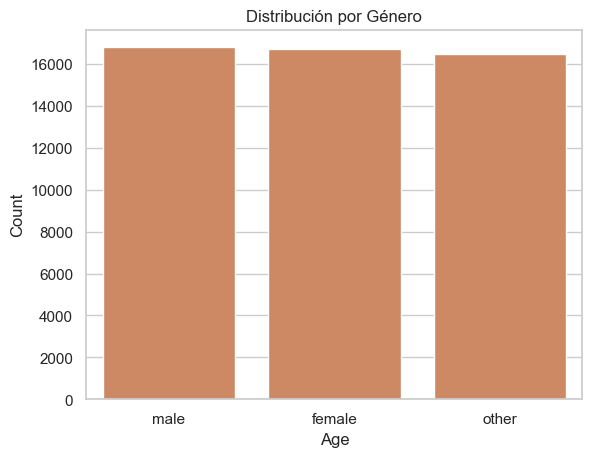

In [175]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de la Edad')

sns.countplot(data=df, x='Gender')
plt.title('Distribución por Género')

## Análisis Visual de Variables Relacionadas con la Severidad del Cáncer

### Severidad según etapa del cáncer

Se representa la distribución de la severidad mediante un diagrama de cajas para cada etapa del cáncer.
### Riesgo Genético vs Severidad

Se analiza la relación entre el riesgo genético y la severidad, diferenciando por género con un gráfico de dispersión.

Text(0.5, 1.0, 'Riesgo Genético vs Severidad')

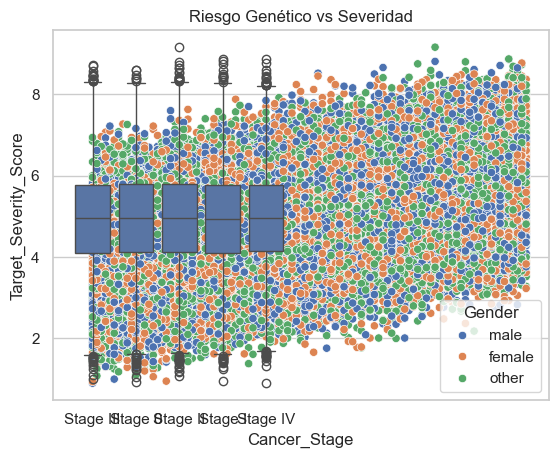

In [176]:
sns.boxplot(data=df, x='Cancer_Stage', y='Target_Severity_Score')
plt.title('Severidad según etapa del cáncer')

sns.scatterplot(data=df, x='Genetic_Risk', y='Target_Severity_Score', hue='Gender')
plt.title('Riesgo Genético vs Severidad')

## Matriz de Correlación

Se muestra la correlación entre variables numéricas usando un mapa de calor con valores anotados para identificar relaciones.

Text(0.5, 1.0, 'Matriz de Correlación')

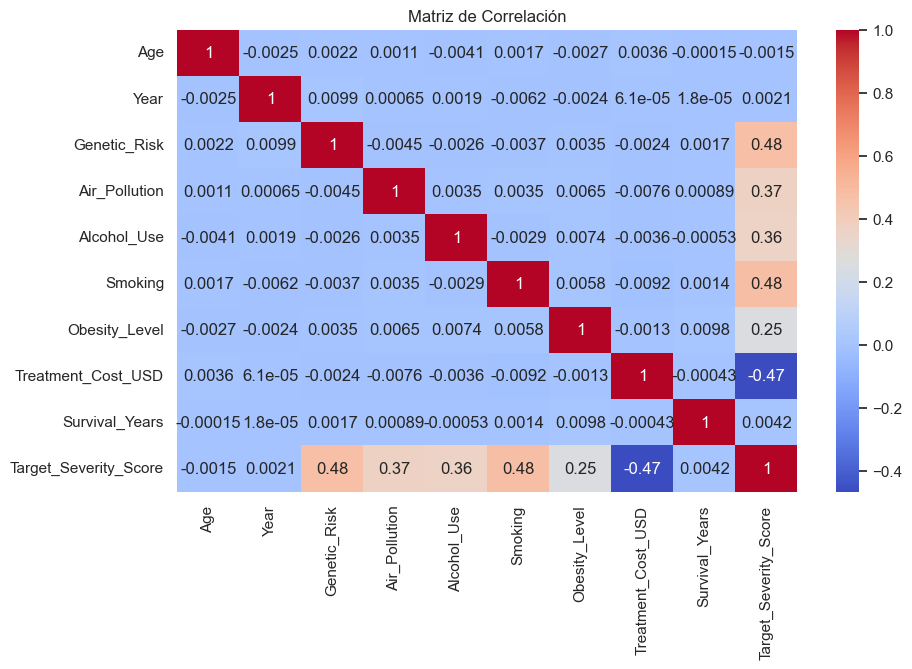

In [177]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')

## Distribución de Severidad Objetivo

Se visualiza la distribución de la variable ‘Target_Severity_Score’ mediante un histograma con curva KDE para evaluar su frecuencia y forma.

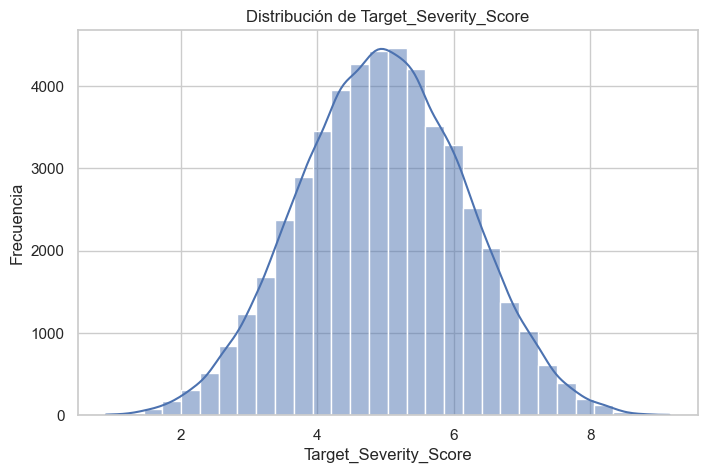

In [178]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Target_Severity_Score'], bins=30, kde=True)
plt.title('Distribución de Target_Severity_Score')
plt.xlabel('Target_Severity_Score')
plt.ylabel('Frecuencia')
plt.show()

## Clasificación de Severidad

Se crea una nueva variable categórica ‘Severity_Label’ que divide ‘Target_Severity_Score’ en tres grupos: Baja, Media y Alta severidad.


In [179]:
df['Severity_Label'] = pd.qcut(df['Target_Severity_Score'], q=3, labels=['Baja', 'Media', 'Alta'])

## Distribución de Clases de Severidad

Se muestra la cantidad de pacientes en cada categoría de severidad (‘Baja’, ‘Media’, ‘Alta’) usando un gráfico de barras.

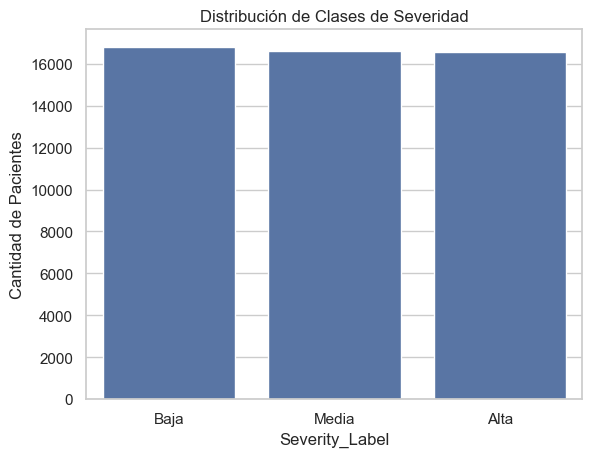

In [180]:
sns.countplot(data=df, x='Severity_Label')
plt.title('Distribución de Clases de Severidad')
plt.ylabel('Cantidad de Pacientes')
plt.show()

## Clasificación de Severidad por Función

Se define una función para categorizar ‘Target_Severity_Score’ en ‘Baja’, ‘Media’ o ‘Alta’ según rangos específicos, y se aplica al DataFrame.

In [181]:
def clasificar_severidad(score):
    if score <= 3:
        return 'Baja'
    elif score <= 6:
        return 'Media'
    else:
        return 'Alta'

df['Severity_Label'] = df['Target_Severity_Score'].apply(clasificar_severidad)

## Distribución de Clases de Severidad

Se muestra la cantidad de pacientes en cada categoría de severidad (‘Baja’, ‘Media’, ‘Alta’) mediante un gráfico de barras.

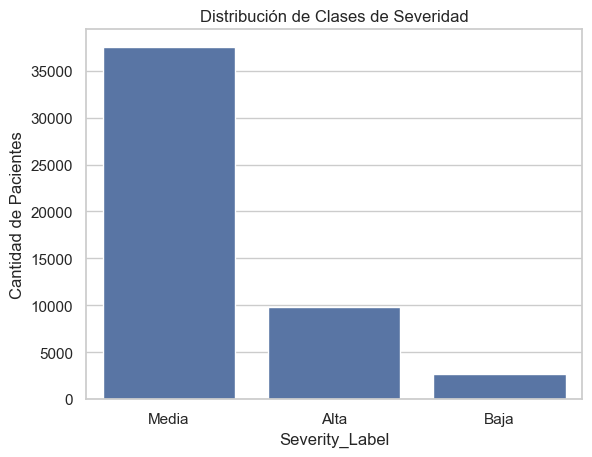

In [182]:
sns.countplot(data=df, x='Severity_Label')
plt.title('Distribución de Clases de Severidad')
plt.ylabel('Cantidad de Pacientes')
plt.show()

## Clasificación basada en media y desviación estándar

Se calcula la media y desviación estándar de ‘Target_Severity_Score’ para clasificar la severidad en ‘Baja’, ‘Media’ o ‘Alta’ según si el puntaje está por debajo, dentro o por encima de un intervalo de una desviación estándar alrededor de la media.
Se visualiza la distribución de estas clases con un gráfico de barras.

Media: 4.95
Desviación estándar: 1.20


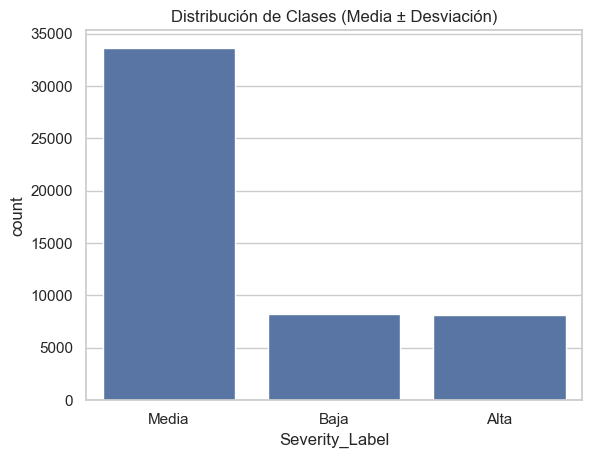

In [183]:
media = df['Target_Severity_Score'].mean()
desviacion = df['Target_Severity_Score'].std()

print(f"Media: {media:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")

def clasificar_con_media_std(score):
    if score < (media - desviacion):
        return 'Baja'
    elif score > (media + desviacion):
        return 'Alta'
    else:
        return 'Media'

df['Severity_Label'] = df['Target_Severity_Score'].apply(clasificar_con_media_std)

sns.countplot(x='Severity_Label', data=df)
plt.title('Distribución de Clases (Media ± Desviación)')
plt.show()

## Comparación de Métodos de Clasificación de Severidad

### Se crean tres columnas con diferentes clasificaciones de severidad:

- Severity_qcut: usa cuantiles para dividir en tres grupos iguales.

- Severity_manual: clasifica según rangos fijos definidos manualmente.

- Severity_std: usa media y desviación estándar para definir las clases.

Luego se imprime la distribución de pacientes en cada categoría para comparar los métodos.

In [184]:
df_copy = df.copy()

df_copy['Severity_qcut'] = pd.qcut(df_copy['Target_Severity_Score'], q=3, labels=['Baja', 'Media', 'Alta'])

def etiqueta_manual(score):
    if score <= 3:
        return 'Baja'
    elif score <= 6:
        return 'Media'
    else:
        return 'Alta'

df_copy['Severity_manual'] = df_copy['Target_Severity_Score'].apply(etiqueta_manual)

media = df_copy['Target_Severity_Score'].mean()
desviacion = df_copy['Target_Severity_Score'].std()

def etiqueta_std(score):
    if score < (media - desviacion):
        return 'Baja'
    elif score > (media + desviacion):
        return 'Alta'
    else:
        return 'Media'

df_copy['Severity_std'] = df_copy['Target_Severity_Score'].apply(etiqueta_std)

for etiqueta in ['Severity_qcut', 'Severity_manual', 'Severity_std']:
    print(f"\nDistribución para {etiqueta}:")
    print(df_copy[etiqueta].value_counts())


Distribución para Severity_qcut:
Severity_qcut
Baja     16809
Media    16605
Alta     16586
Name: count, dtype: int64

Distribución para Severity_manual:
Severity_manual
Media    37536
Alta      9821
Baja      2643
Name: count, dtype: int64

Distribución para Severity_std:
Severity_std
Media    33656
Baja      8222
Alta      8122
Name: count, dtype: int64


## Codificación de etiquetas de severidad

Se aplican codificadores LabelEncoder a las columnas categóricas de severidad para convertir las etiquetas (‘Baja’, ‘Media’, ‘Alta’) en valores numéricos, facilitando su uso en modelos o análisis posteriores.

In [185]:
label_cols = ['Severity_qcut', 'Severity_manual', 'Severity_std']

encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_copy[col + '_Code'] = le.fit_transform(df_copy[col])
    encoders[col] = le 

## Preparación de variables predictoras

Se excluyen columnas no predictoras del DataFrame y se crea X con las variables restantes.
Luego se codifican las columnas categóricas en X con LabelEncoder para convertir texto en números.

In [186]:
no_features = ['Patient_ID', 'Target_Severity_Score',
               'Severity_qcut', 'Severity_manual', 'Severity_std']

X = df_copy.drop(columns=no_features)

cat_cols = X.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

## Preparación de variables objetivo codificadas

Se definen las columnas de severidad según tres métodos y se codifican con LabelEncoder.
Se almacenan las etiquetas codificadas en y_dict y los codificadores en label_encoders para uso posterior en modelos.

In [187]:
etiquetas = {
    'qcut': 'Severity_qcut',
    'manual': 'Severity_manual',
    'std': 'Severity_std'
}

y_dict = {}
label_encoders = {}

for clave, columna in etiquetas.items():
    le = LabelEncoder()
    y_encoded = le.fit_transform(df_copy[columna])
    y_dict[clave] = y_encoded
    label_encoders[clave] = le  

## Definición de Modelos de Machine Learning

Se crea un diccionario modelos que contiene los clasificadores a evaluar, cada uno con su configuración básica:

- **DecisionTree**: Árbol de decisión con semilla fija para reproducibilidad.
- **RandomForest**: Ensamble de árboles aleatorios, también con semilla fija.
- **KNN**: Clasificador de k-vecinos más cercanos (parámetros por defecto).
- **SVM**: Máquina de vectores de soporte con probabilidad activada y semilla fija.
- **NaiveBayes_Gaussian**: Modelo Naive Bayes con distribución Gaussiana.
- **NaiveBayes_Multinomial**: Modelo Naive Bayes multinomial, útil para datos discretos.
- **NaiveBayes_Bernoulli**: Modelo Naive Bayes Bernoulli, adecuado para datos binarios.

Este conjunto de modelos permite comparar distintos enfoques de clasificación supervisada.

In [188]:
modelos = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "NaiveBayes_Gaussian": GaussianNB(),
    "NaiveBayes_Multinomial": MultinomialNB(),
    "NaiveBayes_Bernoulli": BernoulliNB()
}

## Entrenamiento y Evaluación del Modelo KNN para Diferentes Valores de k

Se utiliza la codificación basada en desviación estándar (y = y_dict['std']) como variable objetivo.
Se divide el conjunto en entrenamiento y prueba (80%-20%).
Para valores de vecinos k de 1 a 50, se entrena un clasificador KNN y se calculan métricas: accuracy, precisión, recall y AUC macro.
Se selecciona el mejor k según accuracy y se visualizan:

 - Matriz de confusión del modelo final.

 - Curvas ROC para cada clase con sus AUC correspondientes.

Esta evaluación permite elegir el valor óptimo de k para clasificar la severidad del paciente.


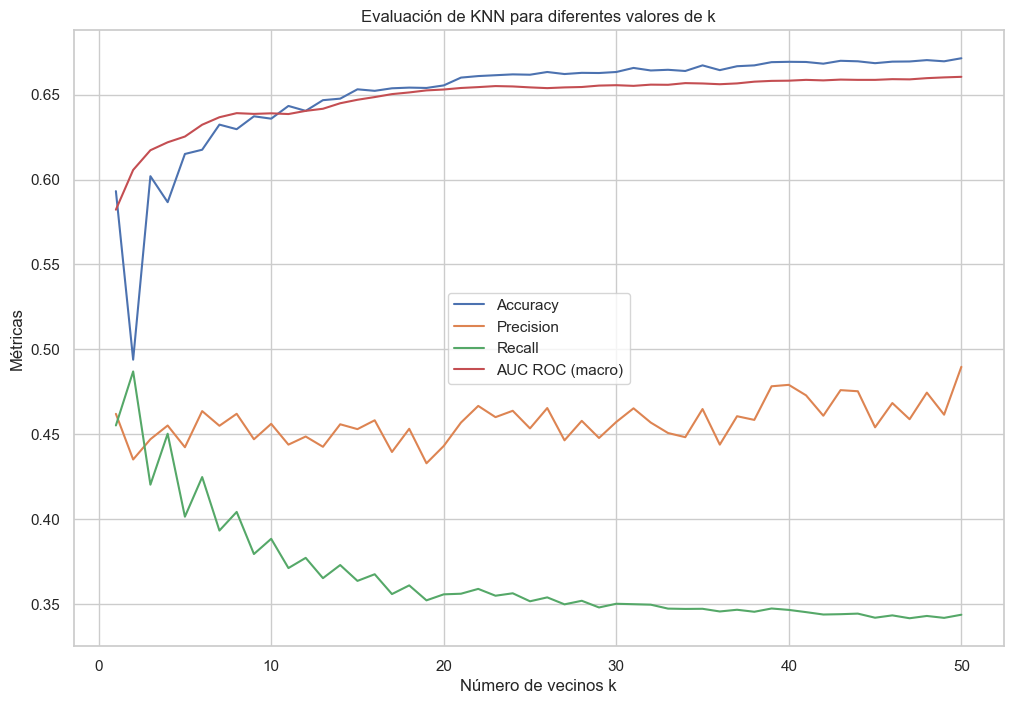

Mejor k según Accuracy: 50


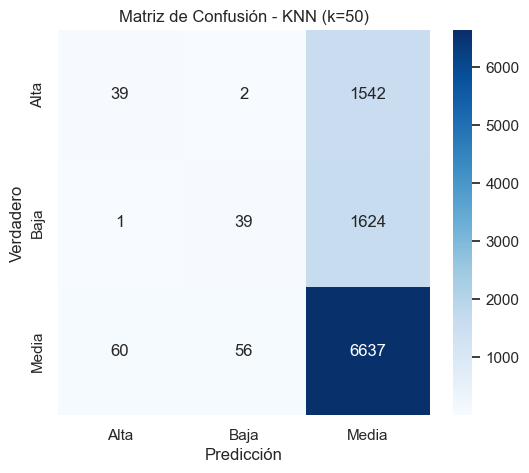

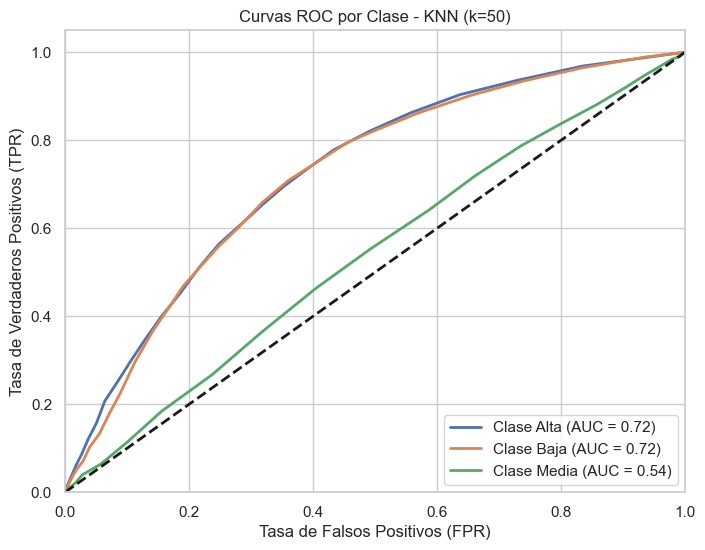

In [189]:
y = y_dict['std']

classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test_bin = label_binarize(y_test, classes=classes)

k_values = range(1, 51)  
accuracies = []
precisions = []
recalls = []
tprs = []  
fprs = []
aucs = []

models = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)
    
    models.append(knn)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i, class_i in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
    
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(classes)
    
    roc_auc_macro = auc(all_fpr, mean_tpr)
    
    tprs.append(mean_tpr)
    fprs.append(all_fpr)
    aucs.append(roc_auc_macro)

plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, aucs, label='AUC ROC (macro)')
plt.xlabel('Número de vecinos k')
plt.ylabel('Métricas')
plt.title('Evaluación de KNN para diferentes valores de k')
plt.legend()
plt.grid(True)
plt.show()

best_k_index = np.argmax(accuracies)
best_k = k_values[best_k_index]
best_model = models[best_k_index]

print(f"Mejor k según Accuracy: {best_k}")

y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['qcut'].classes_,
            yticklabels=label_encoders['qcut'].classes_)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title(f'Matriz de Confusión - KNN (k={best_k})')
plt.show()

plt.figure(figsize=(8, 6))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_i in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_best[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Clase {label_encoders["qcut"].classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title(f'Curvas ROC por Clase - KNN (k={best_k})')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Árboles de decisión: entrenamiento con y sin poda

### Se entrenan dos modelos de árbol de decisión para clasificar la severidad (Severity_std):

   - Uno sin límite de profundidad (sin poda).

   - Otro limitado a max_depth=5 (con poda).

Se codifican variables categóricas y se separan los datos en entrenamiento y prueba (con estratificación).
Para cada modelo se evalúan métricas (accuracy, precisión, recall), matriz de confusión y curvas ROC por clase.
Esto permite comparar el desempeño del árbol completo vs. el podado y observar si la poda mejora la generalización.


=== Sin poda (None) ===
Accuracy: 0.8673
Precision (macro): 0.8302
Recall (macro): 0.8350
True Positives por clase: [1308 1318 6047]
False Positives por clase: [345 339 643]
Matriz de Confusión:
[[1308    0  317]
 [   0 1318  326]
 [ 345  339 6047]]


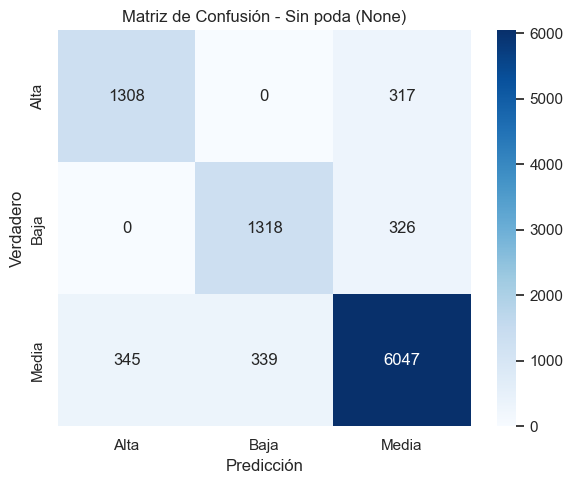

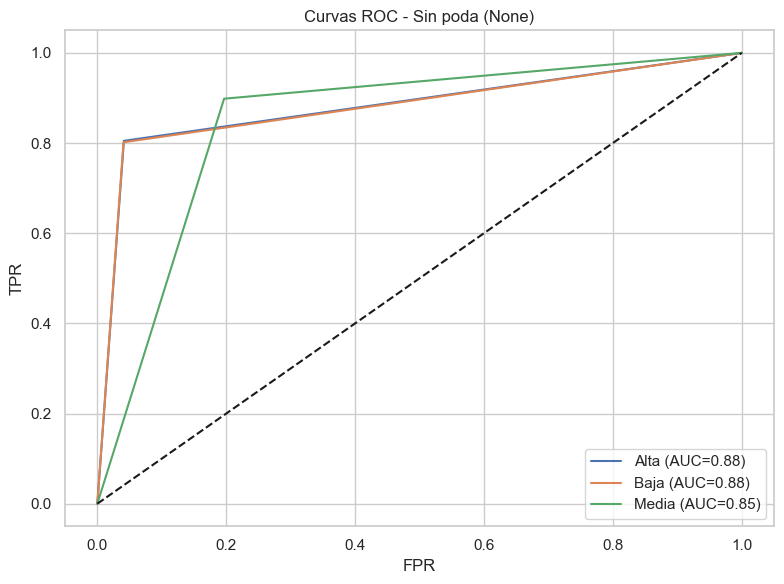


=== Con poda (max_depth=5) ===
Accuracy: 0.7942
Precision (macro): 0.7651
Recall (macro): 0.6802
True Positives por clase: [ 845 1014 6083]
False Positives por clase: [ 291  357 1410]
Matriz de Confusión:
[[ 845    0  780]
 [   0 1014  630]
 [ 291  357 6083]]


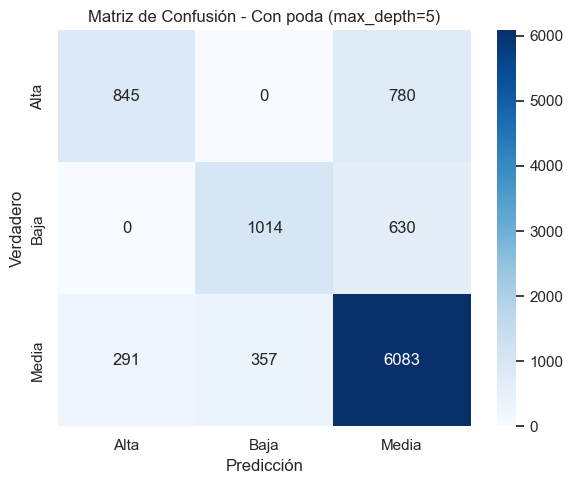

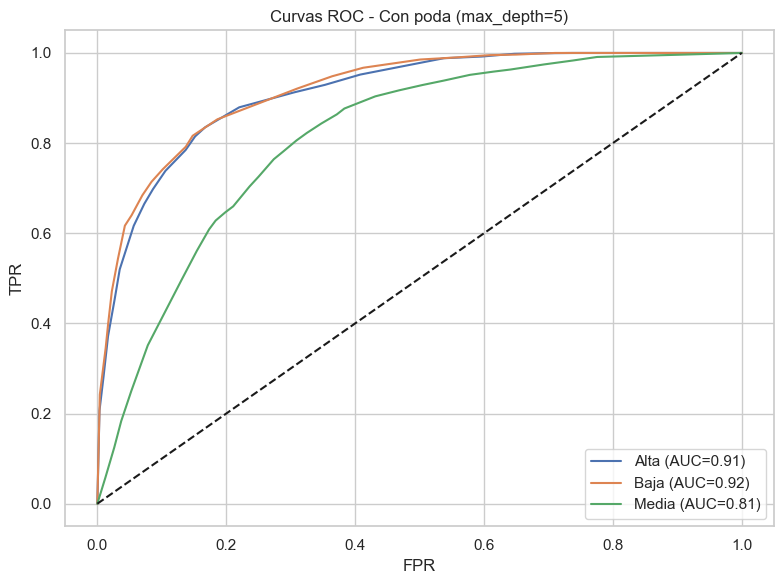

In [190]:
cols_to_exclude = [
    'Patient_ID', 'Target_Severity_Score',
    'Severity_qcut', 'Severity_manual', 'Severity_std',
    'Severity_Label', 'Severity_qcut_Code',
    'Severity_manual_Code', 'Severity_std_Code', 'y'
]

X = df_copy.drop(columns=[col for col in cols_to_exclude if col in df_copy.columns]).copy()

cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

le_target = LabelEncoder()
y = le_target.fit_transform(df_copy['Severity_std'].astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

modelos = {
    "Sin poda (None)": DecisionTreeClassifier(max_depth=None, random_state=42),
    "Con poda (max_depth=5)": DecisionTreeClassifier(max_depth=5, random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP

    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(len(le_target.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    resultados[nombre] = {
        'acc': acc,
        'prec': prec,
        'rec': rec,
        'cm': cm,
        'TP': TP,
        'FP': FP,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'modelo': modelo
    }

    print(f"\n=== {nombre} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"True Positives por clase: {TP}")
    print(f"False Positives por clase: {FP}")
    print("Matriz de Confusión:")
    print(cm)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_,
                yticklabels=le_target.classes_)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,6))
    for i in range(len(le_target.classes_)):
        plt.plot(fpr[i], tpr[i], label=f"{le_target.classes_[i]} (AUC={roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"Curvas ROC - {nombre}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Evaluación de Modelos Naive Bayes

### Se entrenan y comparan tres variantes de Naive Bayes para clasificar la severidad (Severity_std):
- GaussianNB: asume que las variables siguen una distribución normal.

- MultinomialNB: adecuado para variables discretas como conteos.

- BernoulliNB: se basa en variables binarias o booleanas.

### Para cada modelo se calculan:

- Accuracy, precisión y recall macro.

- Verdaderos y falsos positivos por clase.

- Matriz de confusión.

- Curvas ROC por clase y sus AUC.

Esto permite analizar cuál versión de Naive Bayes se ajusta mejor a la naturaleza de los datos.


=== GaussianNB ===
Accuracy: 0.9985
Precision (macro): 0.9993
Recall (macro): 0.9970
True Positives: [1625 1629 6731]
False Positives: [ 0  0 15]
Matriz de Confusión:
[[1625    0    0]
 [   0 1629   15]
 [   0    0 6731]]


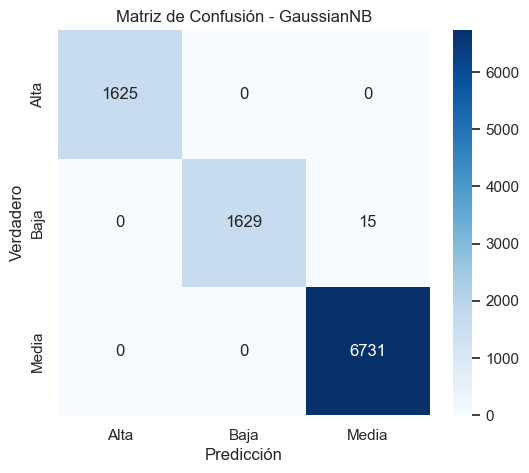

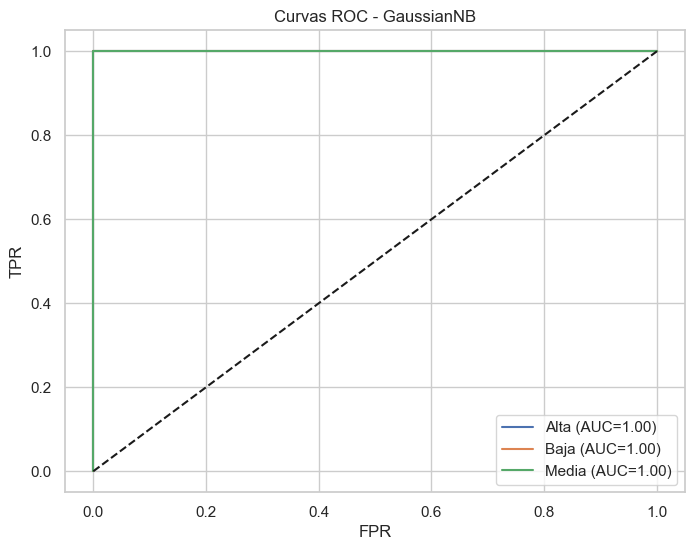


=== MultinomialNB ===
Accuracy: 0.4153
Precision (macro): 0.4583
Recall (macro): 0.5659
True Positives: [1138 1195 1820]
False Positives: [2440 2833  574]
Matriz de Confusión:
[[1138  200  287]
 [ 162 1195  287]
 [2278 2633 1820]]


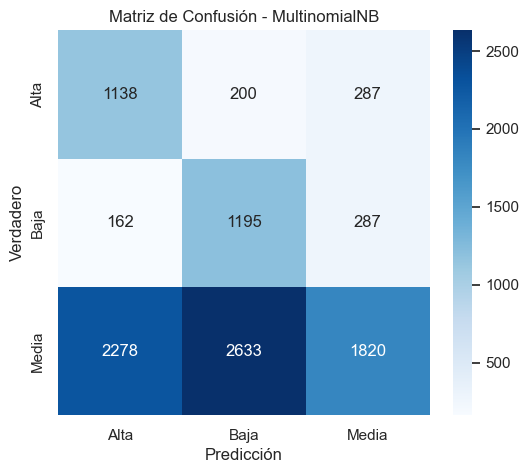

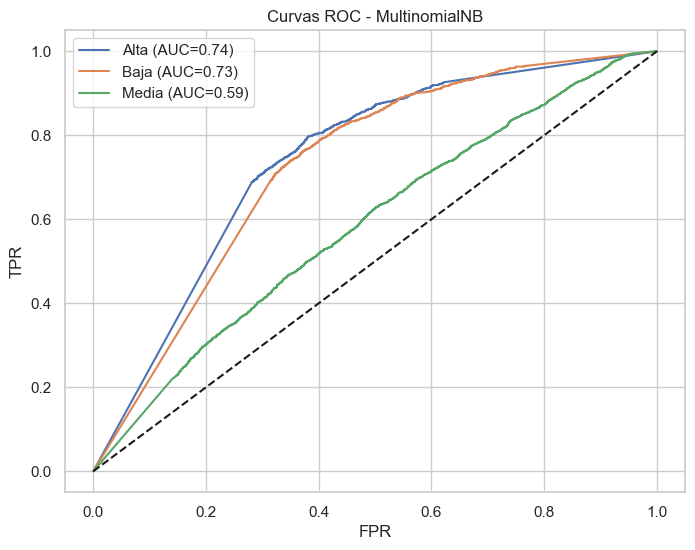


=== BernoulliNB ===
Accuracy: 0.8333
Precision (macro): 0.7255
Recall (macro): 0.6706
True Positives: [1625   33 6675]
False Positives: [   0   56 1611]
Matriz de Confusión:
[[1625    0    0]
 [   0   33 1611]
 [   0   56 6675]]


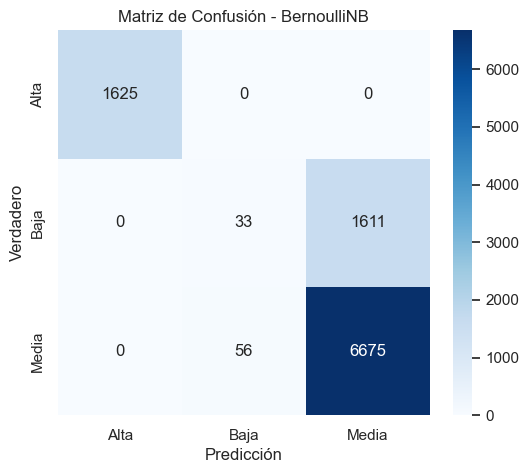

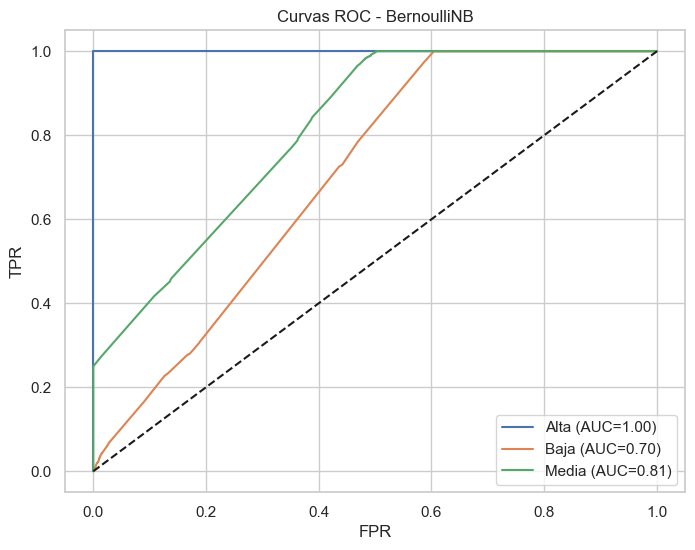

In [191]:
y = df_copy['Severity_std']
le_target = LabelEncoder()
y = le_target.fit_transform(y)

X = df_copy.drop(columns=[
    'Patient_ID', 'Target_Severity_Score',
    'Severity_qcut', 'Severity_manual', 'Severity_std'
], errors='ignore').copy()

for col in X.select_dtypes(include='object'):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

modelos = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

for nombre, modelo in modelos.items():
    print(f"\n=== {nombre} ===")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"True Positives: {TP}")
    print(f"False Positives: {FP}")
    print("Matriz de Confusión:")
    print(cm)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_,
                yticklabels=le_target.classes_)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.show()

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8,6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f"{le_target.classes_[i]} (AUC={roc_auc[i]:.2f})")
    plt.plot([0,1],[0,1],'k--')
    plt.title(f"Curvas ROC - {nombre}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.grid(True)
    plt.show()

## Evaluación de Random Forest con diferentes cantidades de árboles

### Se entrena un modelo Random Forest variando el número de árboles (n_estimators) para clasificar la severidad (Severity_std).
### Para cada modelo se evalúan:

   - Métricas de rendimiento: accuracy, precision, recall y AUC macro.

   - Verdaderos y falsos positivos por clase.

   - Matriz de confusión y curvas ROC por clase.

Se grafica el desempeño en función del número de árboles para identificar el mejor modelo.
Finalmente, se visualiza la matriz de confusión y curvas ROC del modelo con mayor accuracy.

Accuracy: 0.8928
Precision (macro): 0.9483
Recall (macro): 0.7848
TP por clase: [1104 1115 6709]
FP por clase: [  12   10 1050]
Matriz de Confusión:
 [[1104    0  521]
 [   0 1115  529]
 [  12   10 6709]]


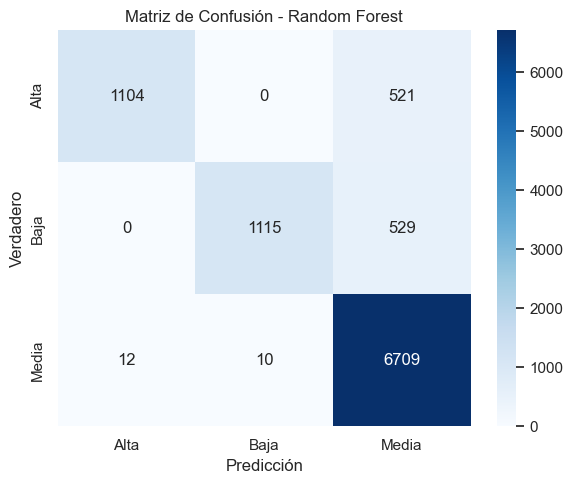

AUC Macro promedio: 0.9900


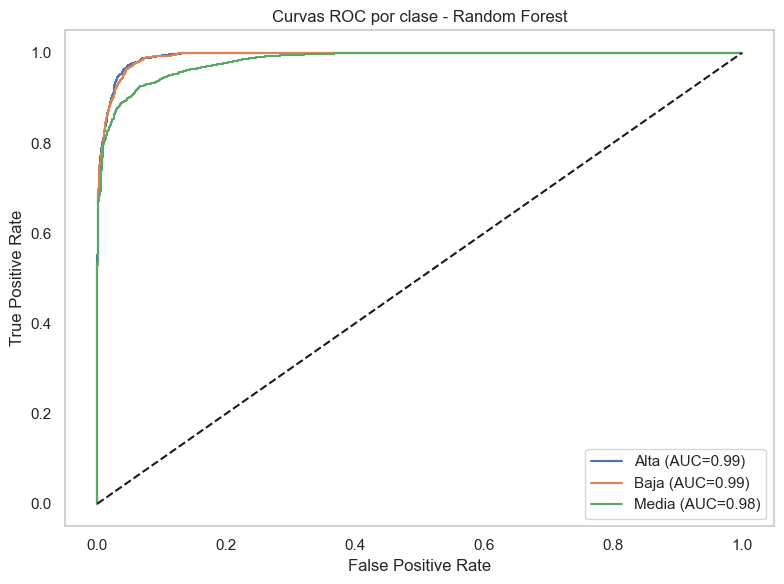

In [192]:
columns_to_exclude = [
    'Patient_ID', 'Target_Severity_Score',
    'Severity_Label', 'Severity_manual', 'Severity_qcut', 'Severity_std',
    'Severity_qcut_Code', 'Severity_manual_Code', 'Severity_std_Code'
]

X = df_copy.drop(columns=[col for col in columns_to_exclude if col in df_copy.columns]).copy()

for col in X.select_dtypes(include='object'):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

target_col = 'Severity_std'
le_target = LabelEncoder()
y = le_target.fit_transform(df_copy[target_col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y_test, y_pred)
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP

print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro): {prec:.4f}")
print(f"Recall (macro): {rec:.4f}")
print(f"TP por clase: {TP}")
print(f"FP por clase: {FP}")
print("Matriz de Confusión:\n", cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.tight_layout()
plt.show()

classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
fpr, tpr, roc_auc = {}, {}, {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
roc_auc_macro = auc(all_fpr, mean_tpr)

print(f"AUC Macro promedio: {roc_auc_macro:.4f}")

plt.figure(figsize=(8,6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"{le_target.classes_[i]} (AUC={roc_auc[i]:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC por clase - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

## Evaluación de KNN usando etiquetas por qcut

### Se entrena el modelo KNN para predecir la severidad de los pacientes usando la clasificación basada en terciles (Severity_qcut).
### Se evalúan 50 valores de k (número de vecinos) y se registran: 

   - Accuracy, precisión, recall y AUC macro para cada k.

   - Se selecciona el mejor modelo según accuracy.

### Del mejor modelo se visualizan:

   - Matriz de confusión para analizar predicciones por clase.

   - Curvas ROC para cada clase, mostrando la capacidad de discriminación del modelo.

Esto permite identificar el valor óptimo de k y evaluar el rendimiento del modelo con esta estrategia de etiquetado.

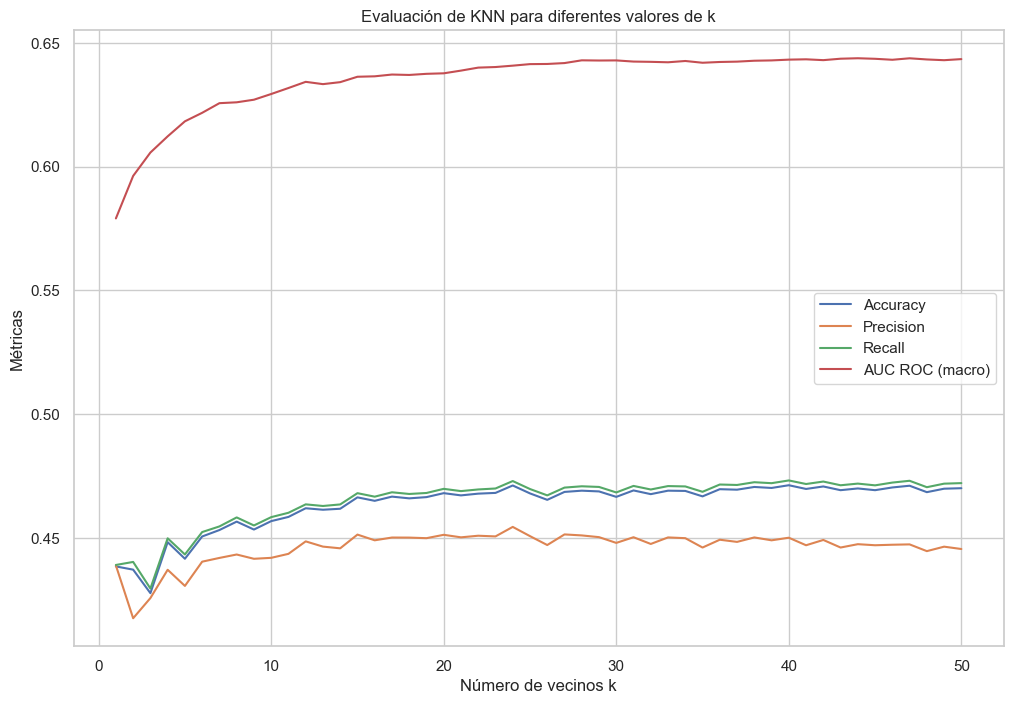

Mejor k según Accuracy: 40


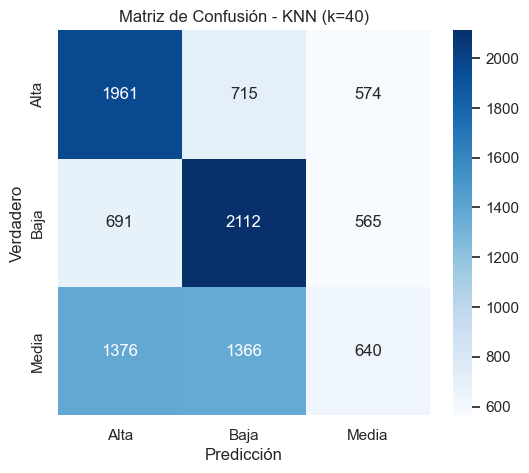

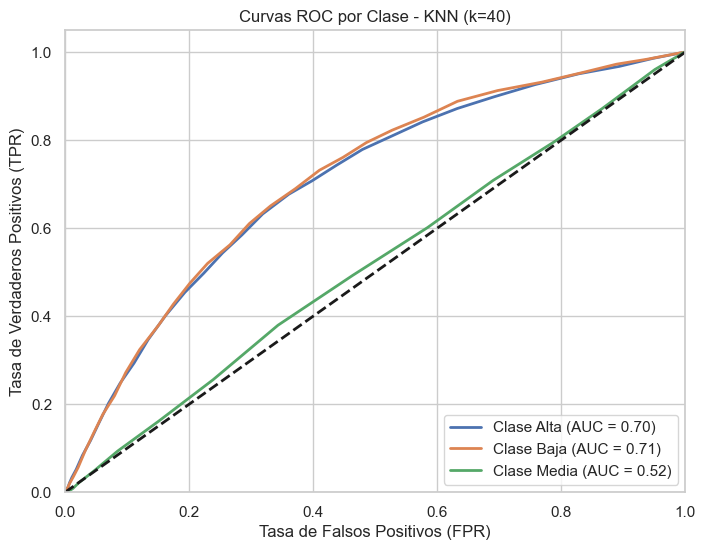

In [193]:
y = y_dict['qcut']

classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test_bin = label_binarize(y_test, classes=classes)

k_values = range(1, 51)  
accuracies = []
precisions = []
recalls = []
tprs = []  
fprs = []
aucs = []

models = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)
    
    models.append(knn)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i, class_i in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
    
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(classes)
    
    roc_auc_macro = auc(all_fpr, mean_tpr)
    
    tprs.append(mean_tpr)
    fprs.append(all_fpr)
    aucs.append(roc_auc_macro)

plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, aucs, label='AUC ROC (macro)')
plt.xlabel('Número de vecinos k')
plt.ylabel('Métricas')
plt.title('Evaluación de KNN para diferentes valores de k')
plt.legend()
plt.grid(True)
plt.show()

best_k_index = np.argmax(accuracies)
best_k = k_values[best_k_index]
best_model = models[best_k_index]

print(f"Mejor k según Accuracy: {best_k}")

y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['qcut'].classes_,
            yticklabels=label_encoders['qcut'].classes_)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title(f'Matriz de Confusión - KNN (k={best_k})')
plt.show()

plt.figure(figsize=(8, 6))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_i in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_best[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Clase {label_encoders["qcut"].classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title(f'Curvas ROC por Clase - KNN (k={best_k})')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Árboles de decisión con etiquetas por qcut

### Se entrenan dos modelos de árbol de decisión para predecir la severidad (Severity_qcut):

   - Uno sin poda (max_depth=None).

   - Otro con poda (max_depth=5).

### Se evalúan y comparan mediante:

   - Métricas de rendimiento: accuracy, precisión, recall.

   - Verdaderos y falsos positivos por clase.

   - Matriz de confusión para visualizar errores de clasificación.

   - Curvas ROC por clase y AUC, para evaluar la calidad del modelo.

Esto permite analizar cómo afecta la poda a la capacidad predictiva y complejidad del modelo.


=== Sin poda (None) ===
Accuracy: 0.8070
Precision (macro): 0.8075
Recall (macro): 0.8068
True Positives por clase: [2828 2860 2382]
False Positives por clase: [468 476 986]
Matriz de Confusión:
[[2828    2  487]
 [   3 2860  499]
 [ 465  474 2382]]


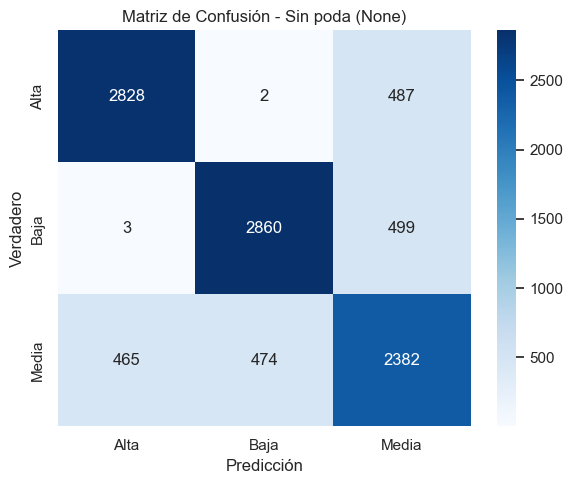

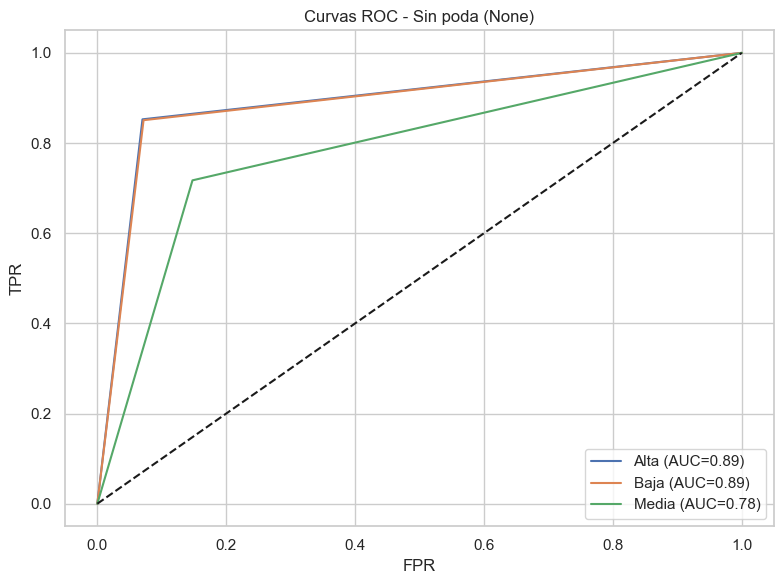


=== Con poda (max_depth=5) ===
Accuracy: 0.6660
Precision (macro): 0.6897
Recall (macro): 0.6657
True Positives por clase: [2087 2492 2081]
False Positives por clase: [ 464  864 2012]
Matriz de Confusión:
[[2087   52 1178]
 [  36 2492  834]
 [ 428  812 2081]]


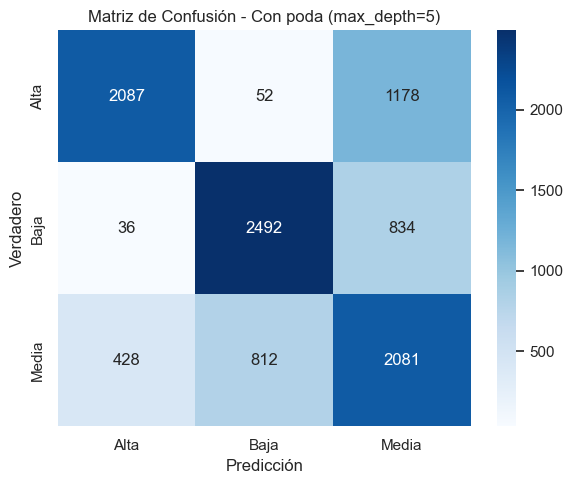

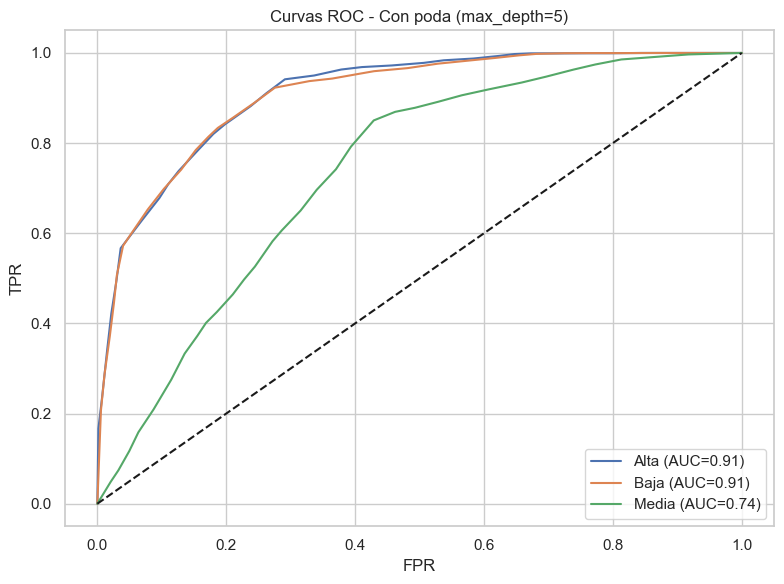

In [194]:
cols_to_exclude = [
    'Patient_ID', 'Target_Severity_Score',
    'Severity_qcut', 'Severity_manual', 'Severity_std',
    'Severity_Label', 'Severity_qcut_Code',
    'Severity_manual_Code', 'Severity_std_Code', 'y'
]

X = df_copy.drop(columns=[col for col in cols_to_exclude if col in df_copy.columns]).copy()

cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

le_target = LabelEncoder()
y = le_target.fit_transform(df_copy['Severity_qcut'].astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

modelos = {
    "Sin poda (None)": DecisionTreeClassifier(max_depth=None, random_state=42),
    "Con poda (max_depth=5)": DecisionTreeClassifier(max_depth=5, random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP

    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(len(le_target.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    resultados[nombre] = {
        'acc': acc,
        'prec': prec,
        'rec': rec,
        'cm': cm,
        'TP': TP,
        'FP': FP,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'modelo': modelo
    }

    print(f"\n=== {nombre} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"True Positives por clase: {TP}")
    print(f"False Positives por clase: {FP}")
    print("Matriz de Confusión:")
    print(cm)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_,
                yticklabels=le_target.classes_)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,6))
    for i in range(len(le_target.classes_)):
        plt.plot(fpr[i], tpr[i], label=f"{le_target.classes_[i]} (AUC={roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"Curvas ROC - {nombre}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Modelos Naive Bayes con etiquetas Severity_qcut

### Se entrenan tres modelos Naive Bayes para predecir la severidad (Severity_qcut):

   - GaussianNB

   - MultinomialNB

   - BernoulliNB

### Cada modelo es evaluado con:

   - Métricas de desempeño: accuracy, precisión y recall.

   - Matriz de confusión para errores por clase.

   - Curvas ROC por clase con sus respectivos AUC.

Esto permite comparar los enfoques probabilísticos y su capacidad para clasificar correctamente los niveles de severidad.


=== GaussianNB ===
Accuracy: 0.9621
Precision (macro): 0.9648
Recall (macro): 0.9624
True Positives: [3271 3029 3321]
False Positives: [  0  38 341]
Matriz de Confusión:
[[3271   38    8]
 [   0 3029  333]
 [   0    0 3321]]


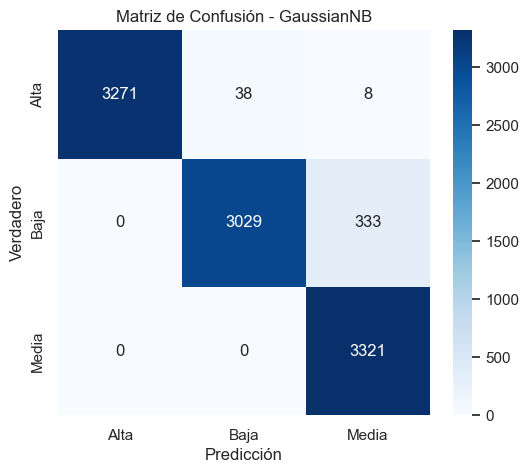

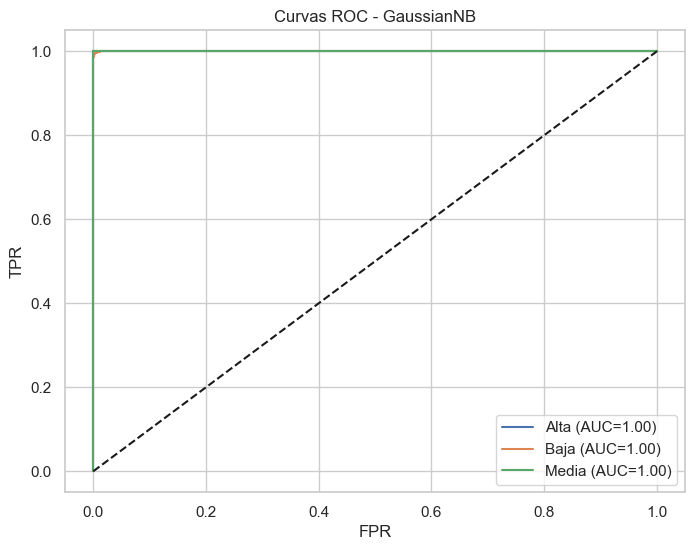


=== MultinomialNB ===
Accuracy: 0.5012
Precision (macro): 0.4785
Recall (macro): 0.5006
True Positives: [2162 2214  636]
False Positives: [1953 2038  997]
Matriz de Confusión:
[[2162  672  483]
 [ 634 2214  514]
 [1319 1366  636]]


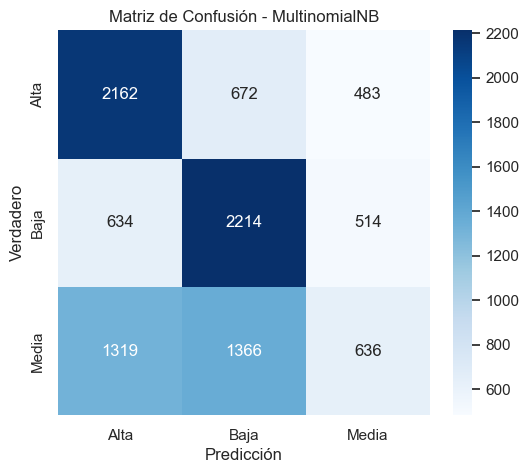

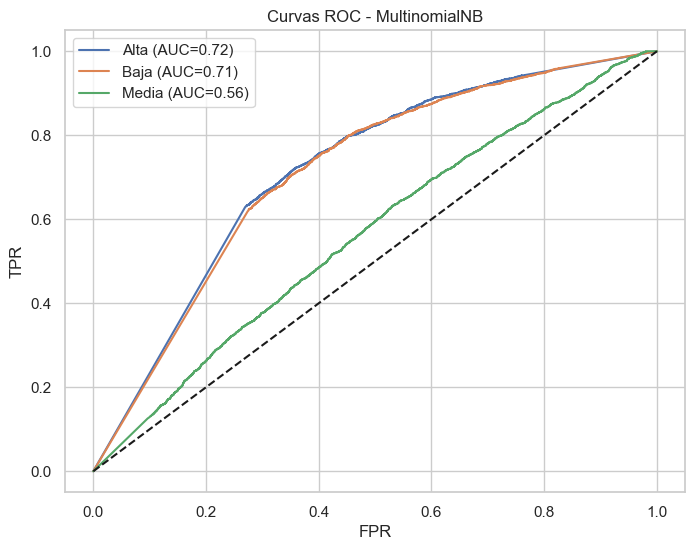


=== BernoulliNB ===
Accuracy: 0.6657
Precision (macro): 0.6663
Recall (macro): 0.6663
True Positives: [3317 1841 1499]
False Positives: [   0 1822 1521]
Matriz de Confusión:
[[3317    0    0]
 [   0 1841 1521]
 [   0 1822 1499]]


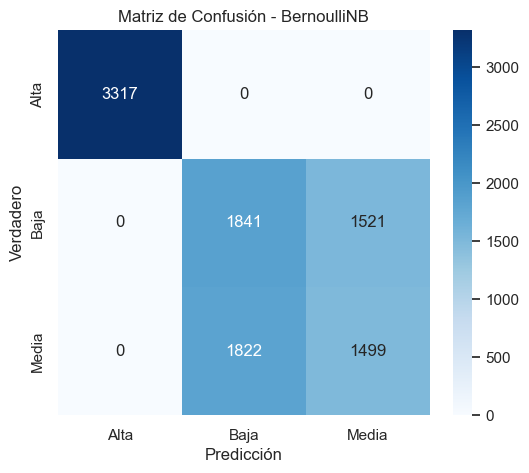

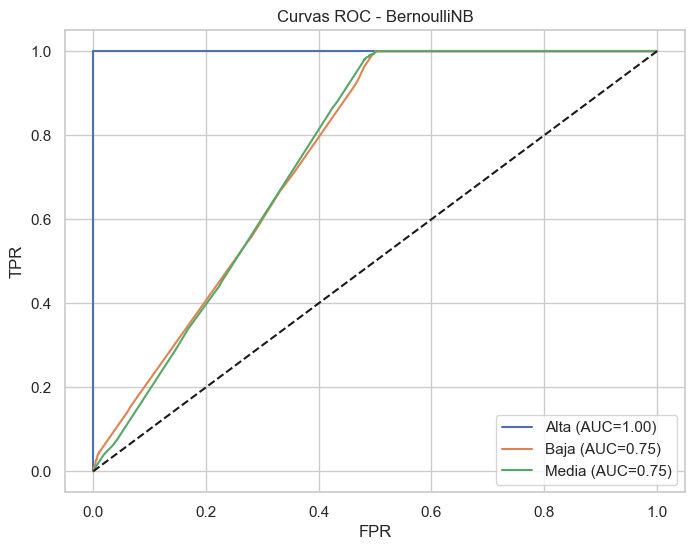

In [195]:
y = df_copy['Severity_qcut']
le_target = LabelEncoder()
y = le_target.fit_transform(y)

X = df_copy.drop(columns=[
    'Patient_ID', 'Target_Severity_Score',
    'Severity_qcut', 'Severity_manual', 'Severity_std'
], errors='ignore').copy()

for col in X.select_dtypes(include='object'):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

modelos = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

for nombre, modelo in modelos.items():
    print(f"\n=== {nombre} ===")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"True Positives: {TP}")
    print(f"False Positives: {FP}")
    print("Matriz de Confusión:")
    print(cm)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_,
                yticklabels=le_target.classes_)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.show()

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8,6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f"{le_target.classes_[i]} (AUC={roc_auc[i]:.2f})")
    plt.plot([0,1],[0,1],'k--')
    plt.title(f"Curvas ROC - {nombre}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.grid(True)
    plt.show()

## Evaluación de Random Forest con diferentes cantidades de árboles (Severity_qcut)

### Se entrena un modelo Random Forest clasificando los niveles de severidad definidos por Severity_qcut, evaluando diferentes cantidades de árboles (n_estimators) con un max_depth fijo de 10.

### Para cada configuración se calculan:

   - Métricas de rendimiento: accuracy, precision, recall y AUC macro.

   - Verdaderos Positivos (TP) y Falsos Positivos (FP) por clase.

   - Matriz de confusión para observar el rendimiento del clasificador por clase.

   - Curvas ROC por clase, obteniendo el AUC individual y macro.

Se construye un gráfico comparativo del rendimiento en función del número de árboles para identificar el mejor modelo.
Posteriormente, se muestran la matriz de confusión y las curvas ROC del modelo con mayor accuracy.

Distribución target: [16586 16809 16605]

Entrenando RandomForest con 10 árboles...
Accuracy: 0.8095
Precision (macro): 0.8454
Recall (macro): 0.8097
TP per class: [2537 2557 3001]
FP per class: [ 171  149 1585]
Confusion Matrix:
 [[2537    0  780]
 [   0 2557  805]
 [ 171  149 3001]]
AUC macro promedio: 0.9455

Entrenando RandomForest con 20 árboles...
Accuracy: 0.8200
Precision (macro): 0.8623
Recall (macro): 0.8202
TP per class: [2525 2549 3126]
FP per class: [  90  105 1605]
Confusion Matrix:
 [[2525    0  792]
 [   0 2549  813]
 [  90  105 3126]]
AUC macro promedio: 0.9563

Entrenando RandomForest con 50 árboles...
Accuracy: 0.8288
Precision (macro): 0.8708
Recall (macro): 0.8290
TP per class: [2538 2581 3169]
FP per class: [  70   82 1560]
Confusion Matrix:
 [[2538    0  779]
 [   0 2581  781]
 [  70   82 3169]]
AUC macro promedio: 0.9656

Entrenando RandomForest con 100 árboles...
Accuracy: 0.8340
Precision (macro): 0.8745
Recall (macro): 0.8342
TP per class: [2556 2604 3180]
FP

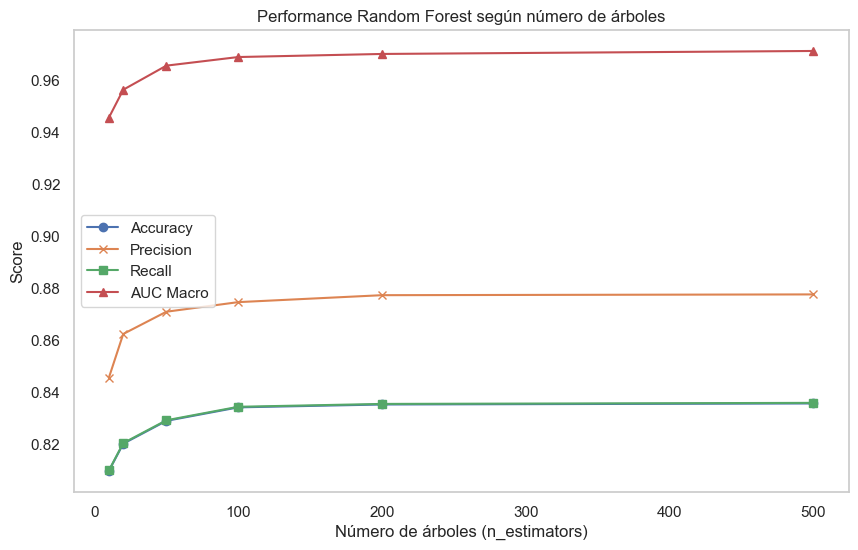


Mejor modelo con 500 árboles


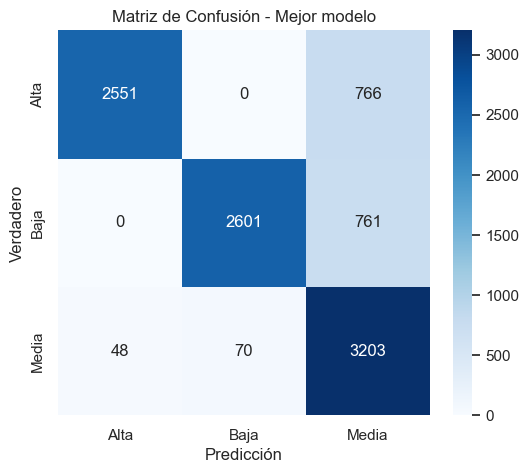

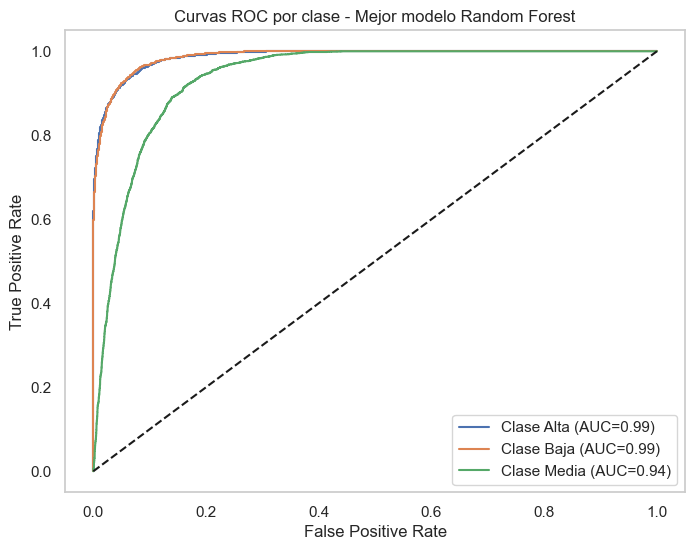

In [196]:
no_features = ['Patient_ID', 'Target_Severity_Score',
               'Severity_qcut', 'Severity_manual', 'Severity_std',
               'Severity_qcut_Code', 'Severity_manual_Code', 'Severity_std_Code']

X = df_copy.drop(columns=no_features, errors='ignore').copy()

cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

le_target = LabelEncoder()
y = le_target.fit_transform(df_copy['Severity_qcut'].astype(str))

print("Distribución target:", np.bincount(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

n_estimators_list = [10, 20, 50, 100, 200, 500]

results = []

for n_estimators in n_estimators_list:
    print(f"\nEntrenando RandomForest con {n_estimators} árboles...")
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, max_depth=10)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    
    cm = confusion_matrix(y_test, y_pred)
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP
    
    classes = np.unique(y)
    y_test_bin = label_binarize(y_test, classes=classes)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(classes)
    roc_auc_macro = auc(all_fpr, mean_tpr)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"TP per class: {TP}")
    print(f"FP per class: {FP}")
    print("Confusion Matrix:\n", cm)
    print(f"AUC macro promedio: {roc_auc_macro:.4f}")
    
    results.append({
        'n_estimators': n_estimators,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'TP': TP,
        'FP': FP,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'roc_auc_macro': roc_auc_macro
    })

import matplotlib.pyplot as plt
df_res = pd.DataFrame(results)

plt.figure(figsize=(10,6))
plt.plot(df_res['n_estimators'], df_res['accuracy'], marker='o', label='Accuracy')
plt.plot(df_res['n_estimators'], df_res['precision'], marker='x', label='Precision')
plt.plot(df_res['n_estimators'], df_res['recall'], marker='s', label='Recall')
plt.plot(df_res['n_estimators'], df_res['roc_auc_macro'], marker='^', label='AUC Macro')
plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('Score')
plt.title('Performance Random Forest según número de árboles')
plt.legend()
plt.grid()
plt.show()

best_idx = df_res['accuracy'].idxmax()
best_result = results[best_idx]

print(f"\nMejor modelo con {best_result['n_estimators']} árboles")

plt.figure(figsize=(6,5))
import seaborn as sns
sns.heatmap(best_result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Matriz de Confusión - Mejor modelo')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    plt.plot(best_result['fpr'][i], best_result['tpr'][i],
             label=f"Clase {le_target.classes_[i]} (AUC={best_result['roc_auc'][i]:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC por clase - Mejor modelo Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Evaluación del modelo K-Nearest Neighbors (KNN) para clasificación según Severity_manual

### Este código realiza una evaluación del algoritmo KNN para el conjunto de datos con la variable objetivo Severity_manual.

- Se prueban valores de vecinos k desde 1 hasta 50.

- Para cada valor de k, se entrena el modelo, se predice en el conjunto de prueba y se calculan las métricas: accuracy, precision (macro), recall (macro) y AUC ROC macro.

- Se visualizan las métricas en función de k para identificar el mejor valor basado en accuracy.

- Se presenta la matriz de confusión y las curvas ROC para el modelo con el mejor k.

Esto permite seleccionar el número óptimo de vecinos que maximiza el rendimiento del clasificador KNN.

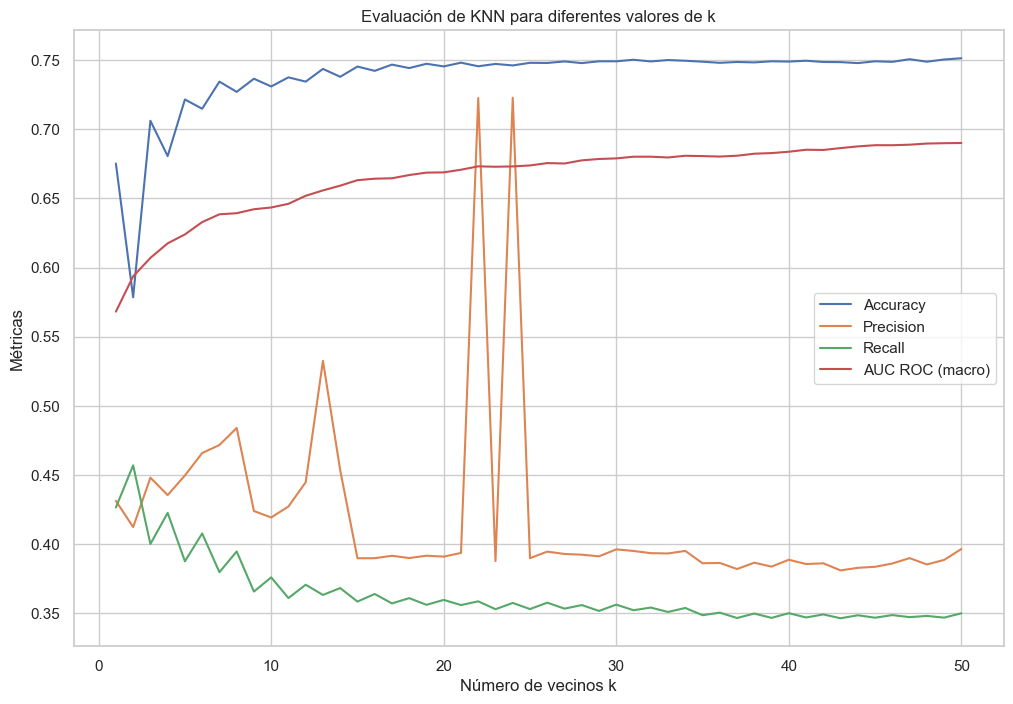

Mejor k según Accuracy: 50


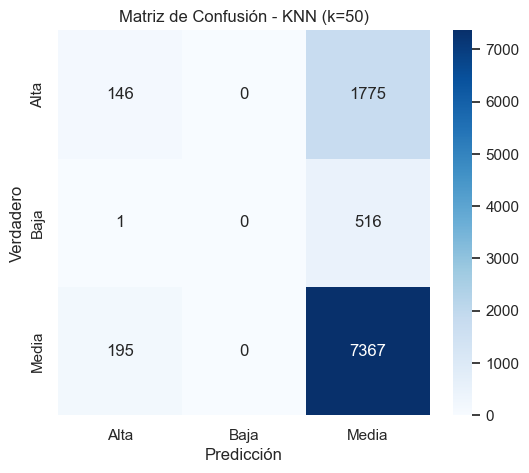

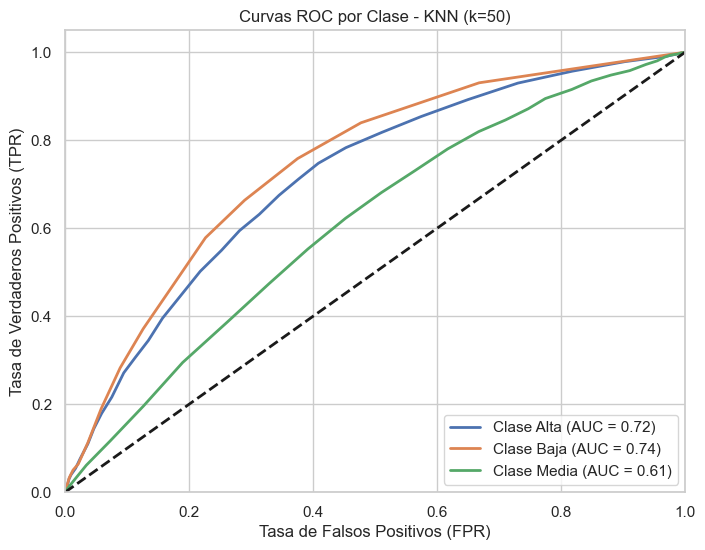

In [197]:
y = y_dict['manual']

classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test_bin = label_binarize(y_test, classes=classes)

k_values = range(1, 51)  
accuracies = []
precisions = []
recalls = []
tprs = []  
fprs = []
aucs = []

models = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)
    
    models.append(knn)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i, class_i in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
    
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(classes)
    
    roc_auc_macro = auc(all_fpr, mean_tpr)
    
    tprs.append(mean_tpr)
    fprs.append(all_fpr)
    aucs.append(roc_auc_macro)

plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, aucs, label='AUC ROC (macro)')
plt.xlabel('Número de vecinos k')
plt.ylabel('Métricas')
plt.title('Evaluación de KNN para diferentes valores de k')
plt.legend()
plt.grid(True)
plt.show()

best_k_index = np.argmax(accuracies)
best_k = k_values[best_k_index]
best_model = models[best_k_index]

print(f"Mejor k según Accuracy: {best_k}")

y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['qcut'].classes_,
            yticklabels=label_encoders['qcut'].classes_)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title(f'Matriz de Confusión - KNN (k={best_k})')
plt.show()

plt.figure(figsize=(8, 6))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_i in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_best[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Clase {label_encoders["qcut"].classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title(f'Curvas ROC por Clase - KNN (k={best_k})')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Clasificación de `Severity_manual` con árboles de decisión

- Preparación: codificación y división estratificada.
- Modelos: sin poda (profundidad ilimitada) y con poda (max_depth=5).
- Métricas: accuracy, precisión, recall, matriz de confusión, AUC-ROC por clase.
- Visualización: matrices de confusión y curvas ROC para ambos modelos.


=== Sin poda (None) ===
Accuracy: 0.8904
Precision (macro): 0.8096
Recall (macro): 0.7957
True Positives por clase: [1573  347 6984]
False Positives por clase: [371 152 573]
Matriz de Confusión:
[[1573    0  391]
 [   0  347  182]
 [ 371  152 6984]]


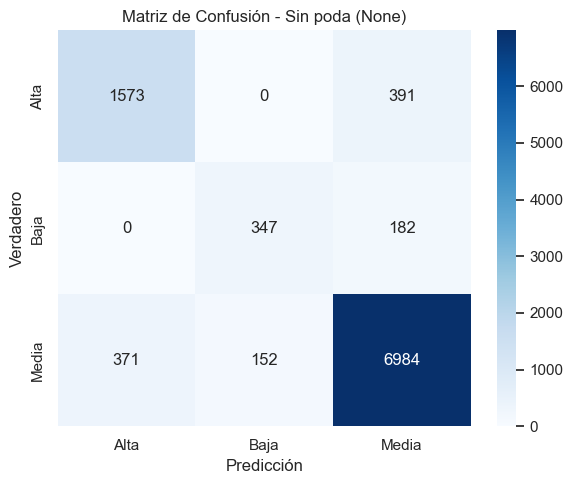

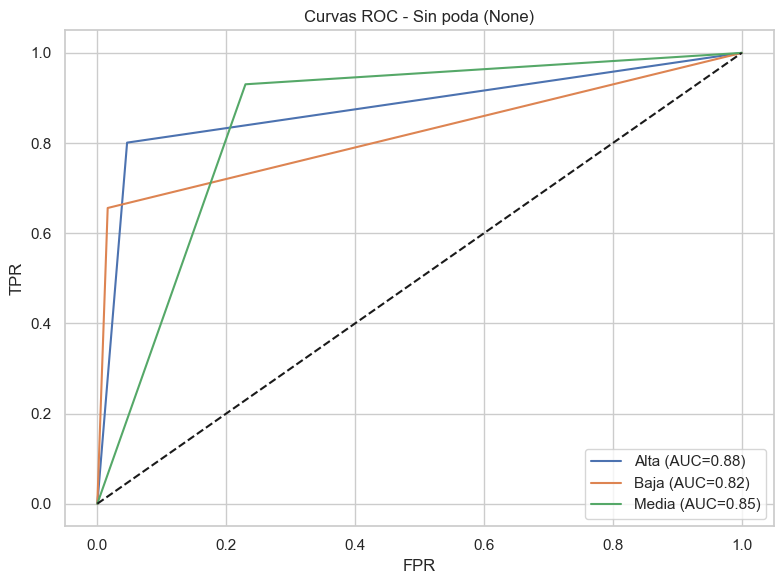


=== Con poda (max_depth=5) ===
Accuracy: 0.8414
Precision (macro): 0.7561
Recall (macro): 0.6275
True Positives por clase: [1110  196 7108]
False Positives por clase: [ 273  126 1187]
Matriz de Confusión:
[[1110    0  854]
 [   0  196  333]
 [ 273  126 7108]]


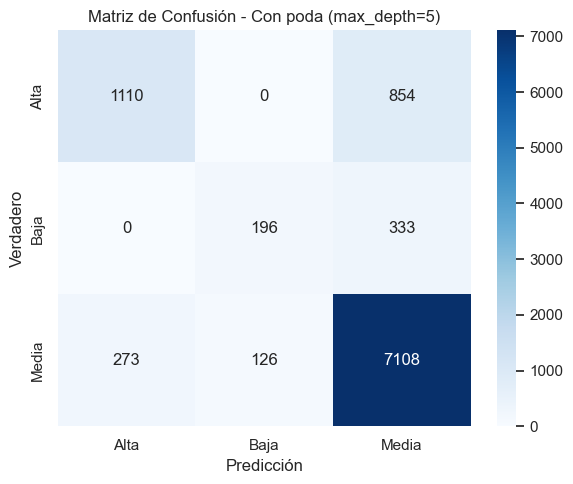

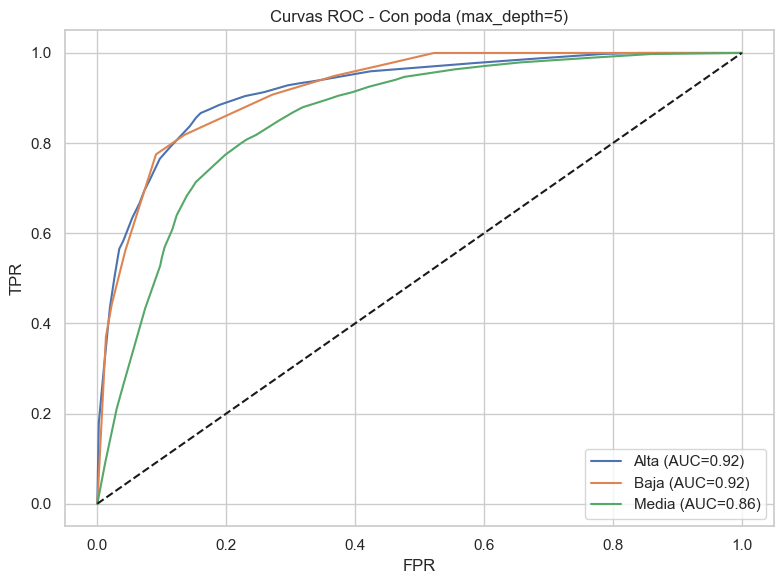

In [198]:
cols_to_exclude = [
    'Patient_ID', 'Target_Severity_Score',
    'Severity_qcut', 'Severity_manual', 'Severity_std',
    'Severity_Label', 'Severity_qcut_Code',
    'Severity_manual_Code', 'Severity_std_Code', 'y'
]

X = df_copy.drop(columns=[col for col in cols_to_exclude if col in df_copy.columns]).copy()

cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

le_target = LabelEncoder()
y = le_target.fit_transform(df_copy['Severity_manual'].astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

modelos = {
    "Sin poda (None)": DecisionTreeClassifier(max_depth=None, random_state=42),
    "Con poda (max_depth=5)": DecisionTreeClassifier(max_depth=5, random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP

    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(len(le_target.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    resultados[nombre] = {
        'acc': acc,
        'prec': prec,
        'rec': rec,
        'cm': cm,
        'TP': TP,
        'FP': FP,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'modelo': modelo
    }

    print(f"\n=== {nombre} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"True Positives por clase: {TP}")
    print(f"False Positives por clase: {FP}")
    print("Matriz de Confusión:")
    print(cm)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_,
                yticklabels=le_target.classes_)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,6))
    for i in range(len(le_target.classes_)):
        plt.plot(fpr[i], tpr[i], label=f"{le_target.classes_[i]} (AUC={roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"Curvas ROC - {nombre}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Se entrenan y evalúan tres modelos Naive Bayes para predecir la severidad manual (Severity_manual):

   - GaussianNB

   - MultinomialNB

   - BernoulliNB

### Para cada modelo se calcula y muestra:

   - Métricas de desempeño: accuracy, precisión macro y recall macro.

   - Matriz de confusión para observar aciertos y errores por clase.

   - Curvas ROC por clase junto con sus valores AUC correspondientes.

Esta evaluación permite comparar distintos modelos probabilísticos y su efectividad en la clasificación de la severidad manual.


=== GaussianNB ===
Accuracy: 0.9913
Precision (macro): 0.9956
Recall (macro): 0.9697
True Positives: [1912  495 7506]
False Positives: [ 0  1 86]
Matriz de Confusión:
[[1912    0   52]
 [   0  495   34]
 [   0    1 7506]]


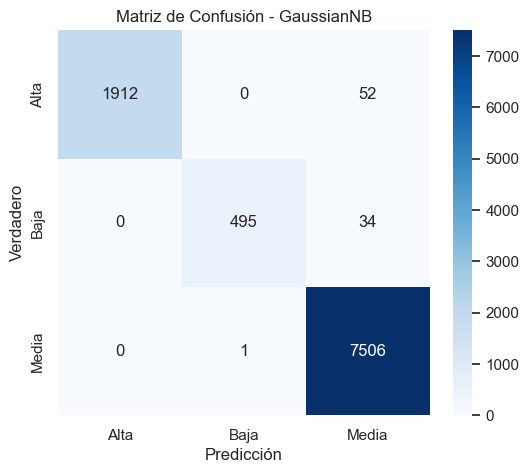

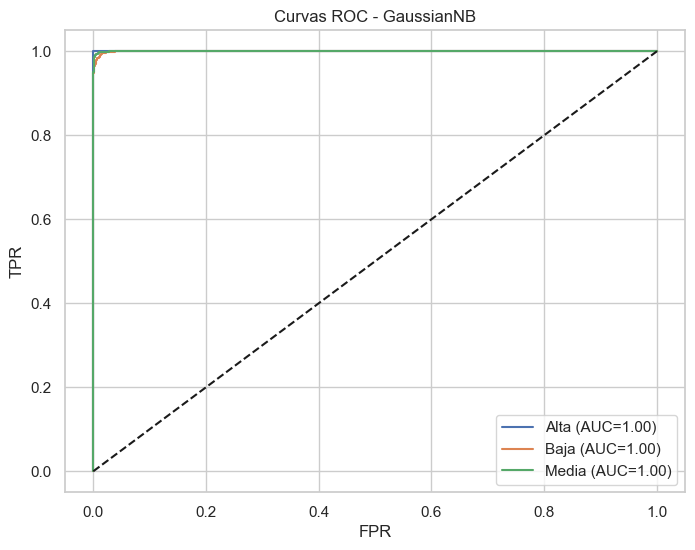


=== MultinomialNB ===
Accuracy: 0.3860
Precision (macro): 0.4312
Recall (macro): 0.5907
True Positives: [1383  420 2057]
False Positives: [2576 3131  433]
Matriz de Confusión:
[[1383  235  346]
 [  22  420   87]
 [2554 2896 2057]]


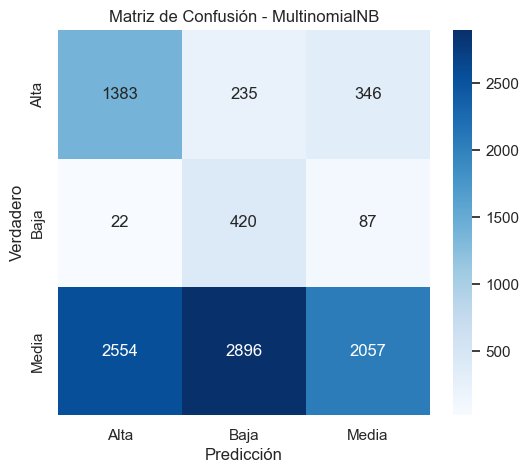

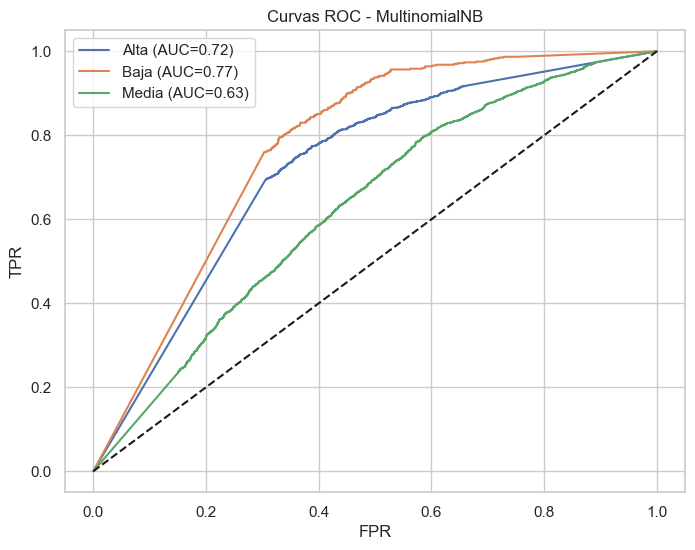


=== BernoulliNB ===
Accuracy: 0.9471
Precision (macro): 0.6447
Recall (macro): 0.6667
True Positives: [1964    0 7507]
False Positives: [  0   0 529]
Matriz de Confusión:
[[1964    0    0]
 [   0    0  529]
 [   0    0 7507]]


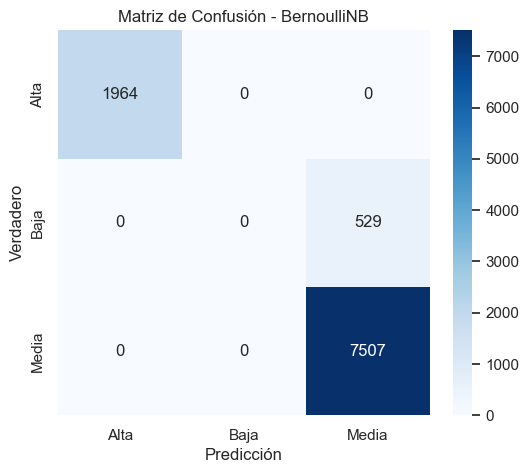

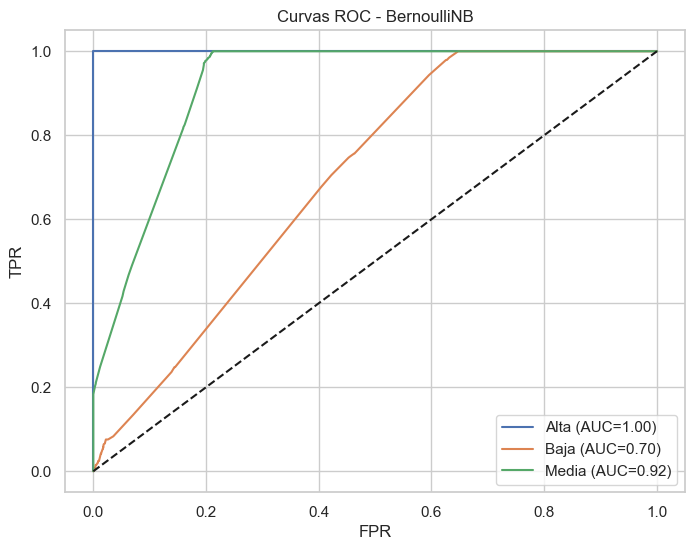

In [199]:
y = df_copy['Severity_manual']
le_target = LabelEncoder()
y = le_target.fit_transform(y)

X = df_copy.drop(columns=[
    'Patient_ID', 'Target_Severity_Score',
    'Severity_qcut', 'Severity_manual', 'Severity_std'
], errors='ignore').copy()

for col in X.select_dtypes(include='object'):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

modelos = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

for nombre, modelo in modelos.items():
    print(f"\n=== {nombre} ===")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"True Positives: {TP}")
    print(f"False Positives: {FP}")
    print("Matriz de Confusión:")
    print(cm)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_,
                yticklabels=le_target.classes_)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.show()

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8,6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f"{le_target.classes_[i]} (AUC={roc_auc[i]:.2f})")
    plt.plot([0,1],[0,1],'k--')
    plt.title(f"Curvas ROC - {nombre}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.grid(True)
    plt.show()

## Evaluación de Random Forest con diferentes cantidades de árboles (Severity_manual)

### Se entrena un modelo Random Forest para clasificar los niveles de severidad definidos por Severity_manual, evaluando distintas cantidades de árboles (n_estimators) con un max_depth fijo de 10.
### Para cada configuración se calculan:

   - Métricas de rendimiento: accuracy, precision, recall y AUC macro.

   - Verdaderos Positivos (TP) y Falsos Positivos (FP) por clase.

   - Matriz de confusión para observar el desempeño del clasificador por clase.

   - Curvas ROC por clase, con AUC individual y macro.

Se genera un gráfico comparativo del rendimiento en función del número de árboles para identificar el mejor modelo.
Finalmente, se muestran la matriz de confusión y las curvas ROC del modelo con mayor accuracy.

Distribución target: [ 9821  2643 37536]

Entrenando RandomForest con 10 árboles...
Accuracy: 0.9350
Precision (macro): 0.9605
Recall (macro): 0.7472
TP per class: [1635  217 7498]
FP per class: [  0   9 641]
Confusion Matrix:
 [[1635    0  329]
 [   0  217  312]
 [   0    9 7498]]
AUC macro promedio: 0.9811

Entrenando RandomForest con 20 árboles...
Accuracy: 0.9349
Precision (macro): 0.9718
Recall (macro): 0.7423
TP per class: [1634  209 7506]
FP per class: [  0   1 650]
Confusion Matrix:
 [[1634    0  330]
 [   0  209  320]
 [   0    1 7506]]
AUC macro promedio: 0.9852

Entrenando RandomForest con 50 árboles...
Accuracy: 0.9344
Precision (macro): 0.9732
Recall (macro): 0.7386
TP per class: [1634  203 7507]
FP per class: [  0   0 656]
Confusion Matrix:
 [[1634    0  330]
 [   0  203  326]
 [   0    0 7507]]
AUC macro promedio: 0.9884

Entrenando RandomForest con 100 árboles...
Accuracy: 0.9331
Precision (macro): 0.9727
Recall (macro): 0.7304
TP per class: [1634  190 7507]
FP per clas

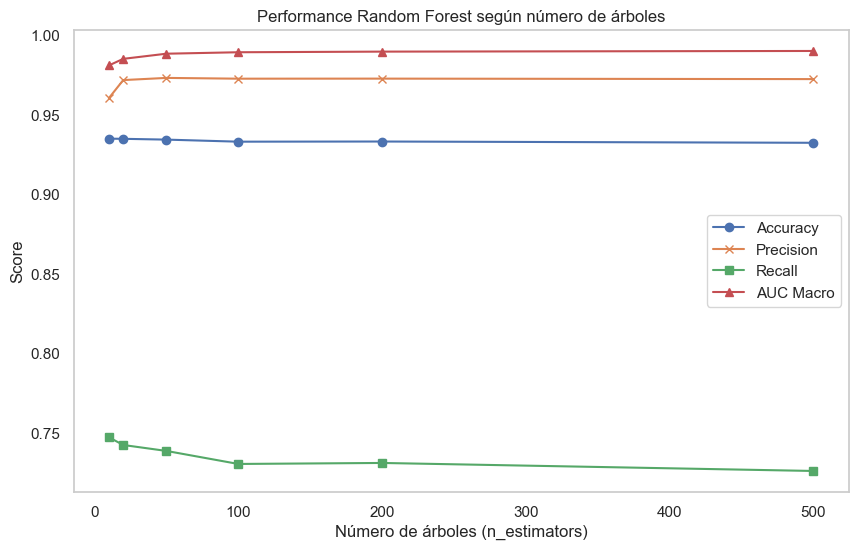


Mejor modelo con 10 árboles


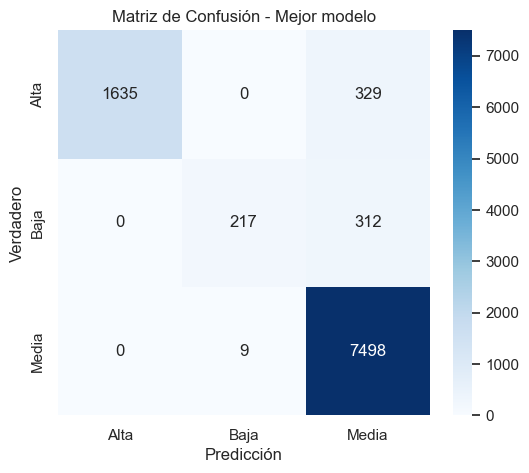

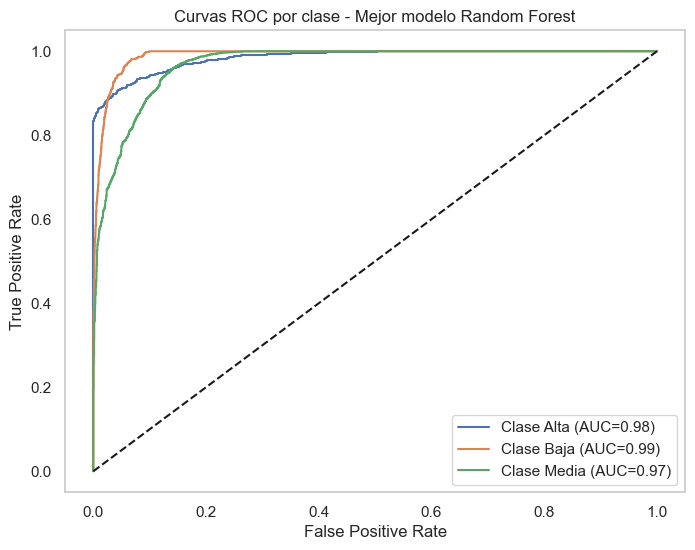

In [200]:
no_features = ['Patient_ID', 'Target_Severity_Score',
               'Severity_qcut', 'Severity_manual', 'Severity_std',
               'Severity_qcut_Code', 'Severity_manual_Code', 'Severity_std_Code']

X = df_copy.drop(columns=no_features, errors='ignore').copy()

cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

le_target = LabelEncoder()
y = le_target.fit_transform(df_copy['Severity_manual'].astype(str))

print("Distribución target:", np.bincount(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

n_estimators_list = [10, 20, 50, 100, 200, 500]

results = []

for n_estimators in n_estimators_list:
    print(f"\nEntrenando RandomForest con {n_estimators} árboles...")
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, max_depth=10)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    
    cm = confusion_matrix(y_test, y_pred)
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP
    
    classes = np.unique(y)
    y_test_bin = label_binarize(y_test, classes=classes)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(classes)
    roc_auc_macro = auc(all_fpr, mean_tpr)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"TP per class: {TP}")
    print(f"FP per class: {FP}")
    print("Confusion Matrix:\n", cm)
    print(f"AUC macro promedio: {roc_auc_macro:.4f}")
    
    results.append({
        'n_estimators': n_estimators,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'TP': TP,
        'FP': FP,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'roc_auc_macro': roc_auc_macro
    })

import matplotlib.pyplot as plt
df_res = pd.DataFrame(results)

plt.figure(figsize=(10,6))
plt.plot(df_res['n_estimators'], df_res['accuracy'], marker='o', label='Accuracy')
plt.plot(df_res['n_estimators'], df_res['precision'], marker='x', label='Precision')
plt.plot(df_res['n_estimators'], df_res['recall'], marker='s', label='Recall')
plt.plot(df_res['n_estimators'], df_res['roc_auc_macro'], marker='^', label='AUC Macro')
plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('Score')
plt.title('Performance Random Forest según número de árboles')
plt.legend()
plt.grid()
plt.show()

best_idx = df_res['accuracy'].idxmax()
best_result = results[best_idx]

print(f"\nMejor modelo con {best_result['n_estimators']} árboles")

plt.figure(figsize=(6,5))
import seaborn as sns
sns.heatmap(best_result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Matriz de Confusión - Mejor modelo')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    plt.plot(best_result['fpr'][i], best_result['tpr'][i],
             label=f"Clase {le_target.classes_[i]} (AUC={best_result['roc_auc'][i]:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC por clase - Mejor modelo Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()